In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hymenoptera/README.md
/kaggle/input/hymenoptera/cover.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/2219621907_47bc7cc6b0.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/183260961_64ab754c97.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/892676922_4ab37dce07.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/147542264_79506478c2.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/8124241_36b290d372.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/751649788_78dd7d16ce.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1119630822_cd325ea21a.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/161292361_c16e0bf57a.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/172772109_d0a8e15fb0.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1743840368_b5ccda82b7.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/1337725712_2eb53cd742.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/854534770_31f6156383.jpg
/kaggle/input/hymenoptera/hymenoptera/val/ants/F.pergan.28(f).

In [2]:
from skimage.transform import resize
from skimage.io import imread
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datadir='/kaggle/input/hymenoptera/hymenoptera/train'
os.listdir(datadir)

['ants', 'bees']

In [4]:
X_train=[]
y_train=[]
categories=['ants', 'bees']
for category in categories: 
    path=os.path.join(datadir,category)
    images=os.listdir(path)
    for img in images:
        imgpath=os.path.join(path,img)
        img_array=imread(imgpath)
        img_resized=resize(img_array,(150,150,1))
        X_train.append(img_resized)
        y_train.append(categories.index(category))
    print("Loaded.....",category)

Loaded..... ants
Loaded..... bees


In [5]:
datadir='/kaggle/input/hymenoptera/hymenoptera/val'
datadir

'/kaggle/input/hymenoptera/hymenoptera/val'

In [6]:
X_test=[]
y_test=[]
categories=['ants', 'bees']
for category in categories:
    path=os.path.join(datadir,category)
    images=os.listdir(path)
    for img in images:
        imgpath=os.path.join(path,img)
        img_array=imread(imgpath)
        img_resized=resize(img_array,(150,150,1))
        X_test.append(img_resized)
        y_test.append(categories.index(category))
    print("Loaded....",category)

Loaded.... ants
Loaded.... bees


In [7]:
for i, sample in enumerate(X_train):
    print(f"Sample {i} shape: {np.shape(sample)}")

Sample 0 shape: (150, 150, 1)
Sample 1 shape: (150, 150, 1)
Sample 2 shape: (150, 150, 1)
Sample 3 shape: (150, 150, 1)
Sample 4 shape: (150, 150, 1)
Sample 5 shape: (150, 150, 1)
Sample 6 shape: (150, 150, 1)
Sample 7 shape: (150, 150, 1)
Sample 8 shape: (150, 150, 1)
Sample 9 shape: (150, 150, 1)
Sample 10 shape: (150, 150, 1)
Sample 11 shape: (150, 150, 1)
Sample 12 shape: (150, 150, 1)
Sample 13 shape: (150, 150, 1)
Sample 14 shape: (150, 150, 1)
Sample 15 shape: (150, 150, 1)
Sample 16 shape: (150, 150, 1)
Sample 17 shape: (150, 150, 1)
Sample 18 shape: (150, 150, 1)
Sample 19 shape: (150, 150, 1)
Sample 20 shape: (150, 150, 1)
Sample 21 shape: (150, 150, 1)
Sample 22 shape: (150, 150, 1)
Sample 23 shape: (150, 150, 1)
Sample 24 shape: (150, 150, 1)
Sample 25 shape: (150, 150, 1)
Sample 26 shape: (150, 150, 1)
Sample 27 shape: (150, 150, 1)
Sample 28 shape: (150, 150, 1)
Sample 29 shape: (150, 150, 1)
Sample 30 shape: (150, 150, 1)
Sample 31 shape: (150, 150, 1)
Sample 32 shape: (

In [8]:
print(f"Sample 108 shape: {np.shape(X_train[108])}")

Sample 108 shape: (150, 150, 1, 3)


In [9]:
X_train = list(X_train)
del X_train[108]
y_train = np.delete(y_train, 108, axis=0)

In [10]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [11]:
X_test.shape,y_test.shape

((153, 150, 150, 1), (153,))

In [12]:
X_train.shape,y_train.shape

((244, 150, 150, 1), (244,))

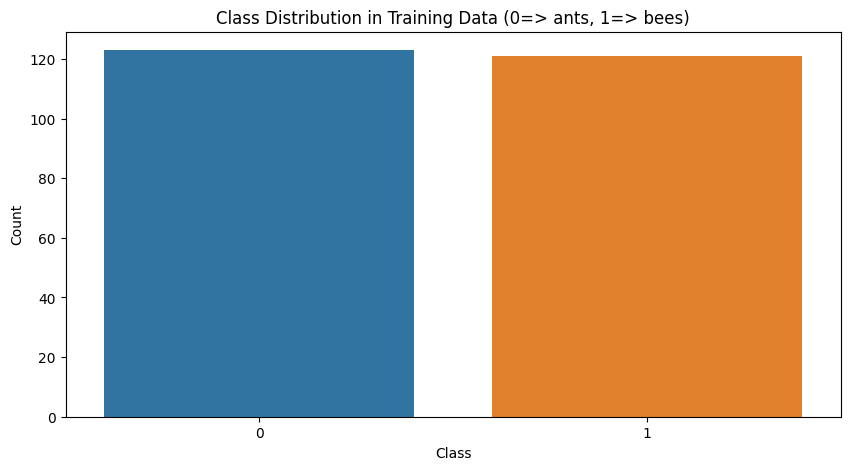

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data (0=> ants, 1=> bees)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

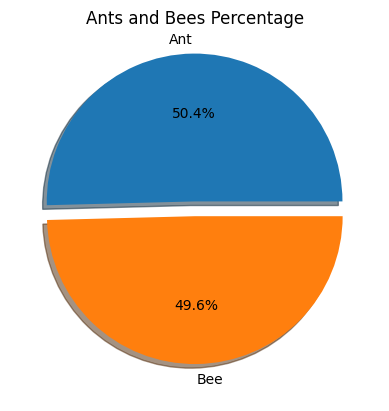

In [14]:
plt.pie([len(y_train[y_train==0]), len(y_train[y_train==1])], 
       labels=["Ant", "Bee"], autopct="%1.1f%%", shadow=True, explode=[0.1, 0])

plt.title("Ants and Bees Percentage")
plt.show()

In [15]:
model=Sequential()
model.add(Conv2D(50,(4,4),input_shape=(150,150,1),activation="relu"))  
model.add(MaxPool2D(3,3))
model.add(Conv2D(50,(4,4),activation="relu")) 
model.add(MaxPool2D(3,3))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=25,batch_size=12)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.4854 - loss: 0.6972
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.5060 - loss: 0.6984
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.5587 - loss: 0.6898
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.5511 - loss: 0.6851
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.5567 - loss: 0.6840
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.6242 - loss: 0.6724
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.5730 - loss: 0.6713
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.5961 - loss: 0.6616
Epoch 9/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.5784 - loss: 0.6737
Epoch 10/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.6294 - loss: 0.6632
Epoch 11/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.5897 - loss: 0.6729
Epoch 12/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/ste

In [18]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.7286 - loss: 0.5579


[0.7512978911399841, 0.5620915293693542]

In [19]:
img=imread('/kaggle/input/hymenoptera/hymenoptera/val/ants/1124525276_816a07c17f.jpg')
img

array([[[  2,   4,   1],
        [  1,   3,   0],
        [  2,   4,   1],
        ...,
        [  3,   4,   0],
        [  5,   6,   1],
        [  4,   5,   0]],

       [[  0,   1,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [  1,   3,   0],
        [  3,   5,   0],
        [  2,   4,   0]],

       [[  1,   3,   0],
        [  0,   2,   0],
        [  0,   1,   0],
        ...,
        [  2,   4,   0],
        [  4,   6,   1],
        [  4,   6,   1]],

       ...,

       [[224, 169, 104],
        [223, 166,  97],
        [221, 160,  93],
        ...,
        [216, 173,  95],
        [233, 186, 118],
        [241, 205, 157]],

       [[226, 174, 114],
        [221, 167, 103],
        [222, 167, 102],
        ...,
        [218, 171, 117],
        [203, 165, 100],
        [210, 157,  89]],

       [[244, 201, 150],
        [237, 192, 135],
        [238, 189, 131],
        ...,
        [183, 118,  52],
        [199, 162, 110],
        [210, 164, 102]]

In [20]:
img=resize(img,(150,150,1))
img=img.reshape(1,150,150,1)

In [21]:
y_new=model.predict(img)
index=y_new.argmax()
categories[index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


'bees'